<a href="https://colab.research.google.com/github/yagmurgcm/yagmurgecm/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*In this project, we applied three supervised machine learning techniques—Linear Regression, Decision Tree Regressor, and Random Forest Regressor—to predict the TCMB interest rate using monthly Google search trends for interest as input features. After preprocessing and merging the datasets by date, we trained the models and evaluated them based on the R² score (coefficient of determination). The R² score allowed us to measure how well each model explained the variation in interest rates. We then selected the model with the highest R² value as the best-performing one, indicating that it provided the most reliable predictions based on the trend data.*

**TCMB Interest Rates vs Interest Rate Search Trends**

In this part of the project, we predicted the TCMB interest rate using Google search trends for interest as input features. We combined search trend data with official interest rate records by date, then applied three machine learning models—Linear Regression, Decision Tree, and Random Forest—to this dataset. After splitting the data into training and test sets, we trained each model and evaluated their performance using the R² score. The Random Forest model achieved the highest R², meaning it explained the interest rate changes most accurately based on search trend data.

Mounted at /content/drive


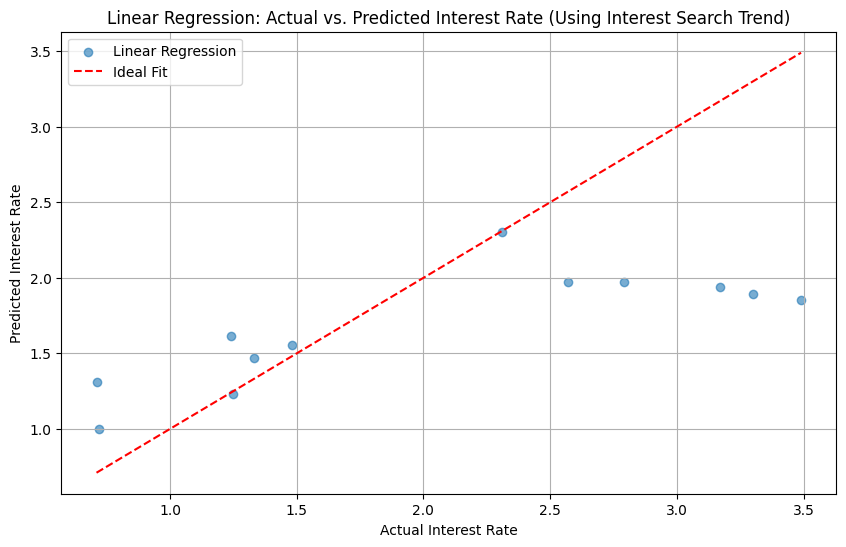

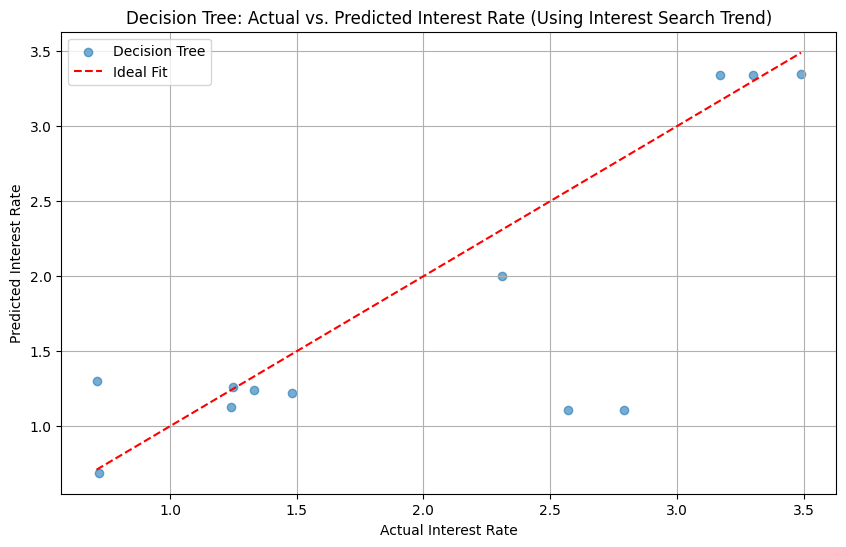

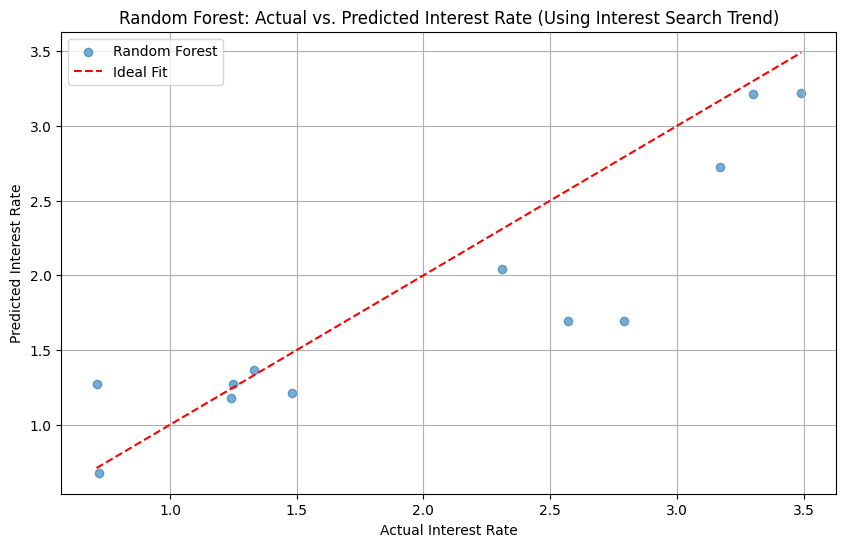

Best Performing Model: Random Forest with R² = 0.76


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

drive.mount('/content/drive')

#read data
faiz_df = pd.read_csv('/content/drive/My Drive/dsa210/monthly_faiz.csv')
faiz_tcmb_df = pd.read_csv('/content/drive/My Drive/dsa210/faizTCMB.csv')

#change format
faiz_df["Month"] = pd.to_datetime(faiz_df["Month"])
faiz_tcmb_df["Date"] = pd.to_datetime(faiz_tcmb_df["Date"])

#merge datasets
merged_df = faiz_df.merge(faiz_tcmb_df[["Date", "Interest"]], left_on="Month", right_on="Date")

#clean data
merged_df.drop(columns=["Date"], inplace=True)
merged_df.dropna(inplace=True)

X = merged_df[["faiz_trend"]]
y = merged_df["Interest"]

# train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

#train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"R²": r2}

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
    plt.title(f"{name}: Actual vs. Predicted Interest Rate (Using Interest Search Trend)")
    plt.xlabel("Actual Interest Rate")
    plt.ylabel("Predicted Interest Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

#choose best
best_model = max(results, key=lambda x: results[x]['R²'])
print(f"Best Performing Model: {best_model} with R² = {results[best_model]['R²']:.2f}")


**TCMB Inflation Rates vs Inflation Rates Search Trends**

In this part, we predicted Turkey’s inflation rate using monthly Google search trends for inflation as the input variable. We merged official inflation data from the Central Bank (TCMB) with the search trend data based on date. Then, we applied three machine learning models—Linear Regression, Decision Tree, and Random Forest—to find the best fit. We evaluated the models using the R² score and visualized the actual vs. predicted inflation values. The model with the highest R² was selected as the best-performing one, showing how well the search trend data explains inflation movements.

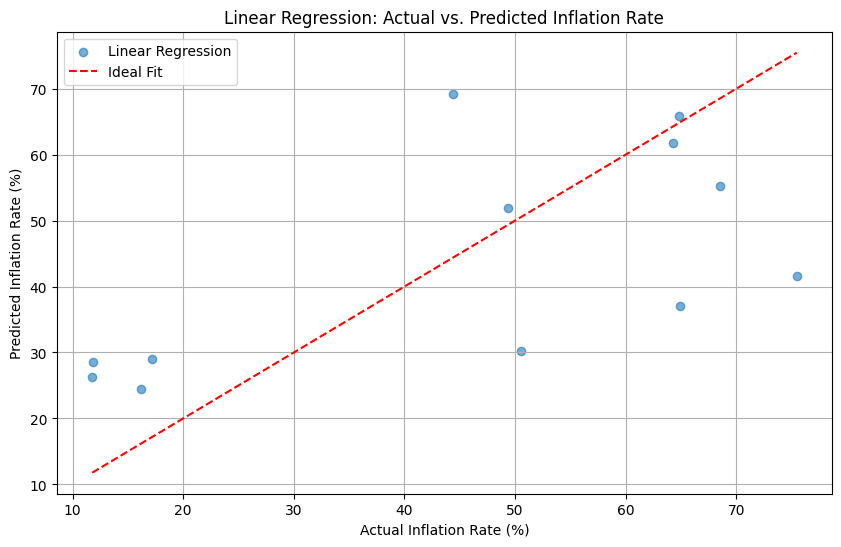

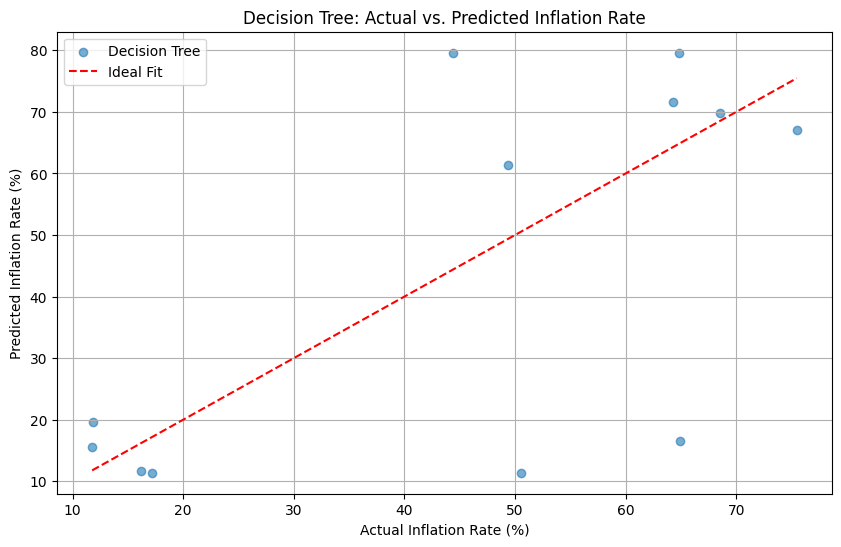

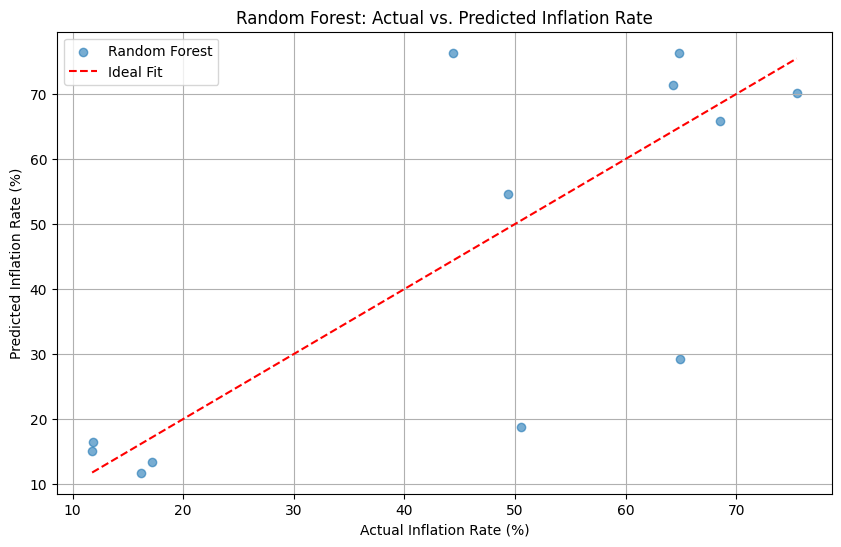

('Random Forest', {'MSE': 300.47329321243154, 'R²': 0.4448192284756979})

In [2]:

#read data
inflation_tcmb_df = pd.read_csv('/content/drive/My Drive/dsa210/inflationTCMB.csv')
monthly_enflasyon_df = pd.read_csv('/content/drive/My Drive/dsa210/monthly_enflasyon.csv')

#change format
monthly_enflasyon_df["Month"] = pd.to_datetime(monthly_enflasyon_df["Month"])
inflation_tcmb_df["Date"] = pd.to_datetime(inflation_tcmb_df["Date"])

#merge datasets
inflation_merged = monthly_enflasyon_df.merge(
    inflation_tcmb_df[["Date", "Annual Change (%)"]],
    left_on="Month", right_on="Date")

inflation_merged.drop(columns=["Date"], inplace=True)
inflation_merged.dropna(inplace=True)

X = inflation_merged[["enflasyon_trend"]]
y = inflation_merged["Annual Change (%)"]

#train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

#train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
    plt.title(f"{name}: Actual vs. Predicted Inflation Rate")
    plt.xlabel("Actual Inflation Rate (%)")
    plt.ylabel("Predicted Inflation Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

#choose best
best_model = max(results, key=lambda x: results[x]['R²'])
best_model, results[best_model]
